#An analysis of paleo-present climate data

An analysis of paleo-present climate data
  - Analyse CO2 vs Temperature Anomaly from 800kyrs – present.
  - Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)
  - Examine Irish context:
    - Climate change signals: (see Maynooth study: The emergence of a climate change
signal in long-term Irish meteorological observations - ScienceDirect)
  - Fuse and analyse data from various data sources and format fused data set as a pandas
dataframe and export to csv and json formats
  - For all of the above variables, analyse the data, the trends and the relationships between
them (temporal leads/lags/frequency analysis).
  - Predict global temperature anomaly over next few decades (synthesise data) and compare to
published climate models if atmospheric CO2 trends continue
  - Comment on accelerated warming based on very latest features (e.g. temperature

The European Project for Ice Coring in Antartica Dome ice core (EPICA) is a project that has been reconstructing the cliamte and atmospheric record going back 800,000 years (kyr).[[1]](https://agupubs.onlinelibrary.wiley.com/doi/pdfdirect/10.1002/2014GL061957).

This was achieved by drilling and extracting ice cores and measuring the levels of certain atmospheric molecules such as Carbon Dioxide (CO2), Methane (CH4) and deuterium which can be used as a proxy for temperature. There are bubbles in the ice containing air from long ago, using mass spectrometers the concentrations of these molecules in the air can be determined.  The deeper you drill the further back in time you are looking. 

Two stations were set up in Concordia Station at Dome C and Kohnen Station Antartica. The drilling process began in 2004. They were able to obtain core samples at 3270.2m deep. At this depth the samples date back 800kyr.

There have been many other similar projects such as at Vostok station [[2]](https://www.ncei.noaa.gov/access/paleo-search/study/2443), a Russian research station in Antartica. Here they obtained samples dating back 420kyr.

By examining the levels of greenhouse gases in the samples they were able to show how the atmosphere changes over timee. As deuterium can be used as an indicator for temperature, they have been able to plot the levels of Co2 and other greenhouse gases against the temperature at the time. This allows an examination of any correlation that occurs between them. 

![graph showing relationship between greenhouse gases and temperature](https://www.e-education.psu.edu/geog3/sites/www.e-education.psu.edu.geog3/files/Mod6/Co2-temperature-records.png)



In 1958 at the Mauna Loa Observatory in Hawaii, C. David Keeling began recording CO2 levels in the air. They produce a monthly mean carbon dioxide level report. It is the longest record of direct measurements of Co2 in the atmosphere.

they also track CH4 and N20 levels. 

https://gml.noaa.gov/ccgg/trends/data.html

unc = levels of uncertainty

reading
https://www.e-education.psu.edu/geog3/sites/www.e-education.psu.edu.geog3/files/Mod6/Co2-temperature-records.png
#
https://rpubs.com/gregory_halverson/mauna_loa

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



On the EPA website I found a database that has amalgamated the results from previous studies (EPICA Dome C, Vostok, Siple Station, Antarctica, Mauna Loa, Hawaii, Barrow, Alaska, Cape Matatula,  American Samoa, South Pole, Antarctica, Cape Grim, Australia, Lampedusa Island, Italy, Shetland Islands, Scotland) of Co2 atmosphere levels going back to 800kyr. The most recent datapoints were from 2015. As the Mauna Loa data is updated yearly I added 2016-2022 to the spreadsheet myself. 


As there are a number of overlaps between different studies, in cases where there are multiple values I will attempt to obtain an average value for that year. 



In [2]:
#import dataset from Nature and compare composite values with IPCC
#nature dataset is downloaded as "41586_2008_BFnature06949_MOESM31_ESM.xls" and had one sheet called Composite. I have saved this as a seperate CSV file called nature_dataset.csv to allow easy import

nature = pd.read_csv('Datasets Used/Nature_dataset.csv', skiprows=6,) #the data we want begins on line 7
nature = nature.iloc[:, :2]
nature.columns = ['Year', 'CO2(ppmv)'] #re-naming column 1
nature.head()


,Year,CO2(ppmv)
0,137,280.4
1,268,274.9
2,279,277.9
3,395,279.1
4,404,281.9


In [3]:
nature.tail()

,Year,CO2(ppmv)
1091,794608,199.4
1092,795202,195.2
1093,796467,189.3
1094,797099,188.4
1095,798512,191.0


Text(0.5, 0, 'Years, from 800kyr to 2022')

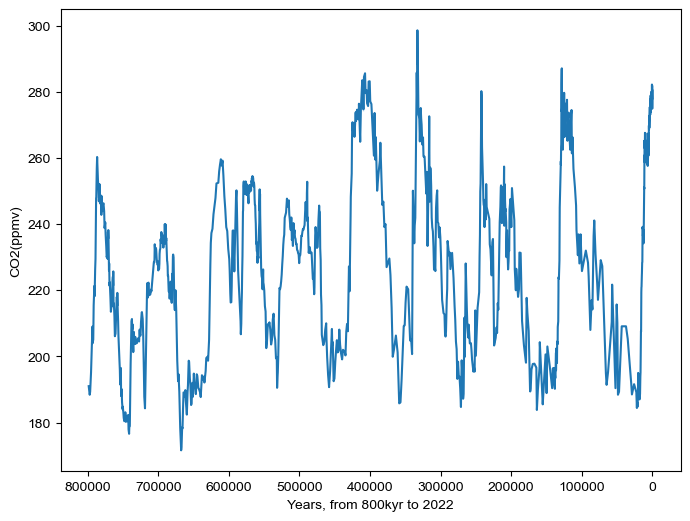

In [4]:
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

sns.lineplot(nature, x = "Year", y = "CO2(ppmv)",)
sns.set_style("darkgrid" , {"ytick.major.size": 10 , "ytick.minor.size": 2 , 'grid.linestyle': '--'})
plt.gca().invert_xaxis() # reversing x axis so 2023 is furthest to the right

#plt.xlim(-800000, 0) # went to 10000 to allow us to see the values in the present day
#plt.ylabel('Atmospheric CO2 levels(ppm)')
plt.xlabel('Years, from 800kyr to 2022')

There is also another dataset provided by The Intergovernmental Panel on Climate Change. This dataset has atmospheric Co2 values from 800ky bp up until 2020. This is an amalgamation of previous studies just like the Nature dataset but from eyeballing the values don't seem to be the same. For example IPCC has 1900 values going up until the year 2000 while Nature has 1095 values and only goes up until 1813. I will plot this dataset as well to see if it matches the previous plot

In [5]:
#import dataset from IPCC and compare composite values with Nature
#IPCC dataset is downloaded as "grl52461-sup-0003-supplementary.xls" and had one sheet called Composite. I have saved this as a seperate CSV file called 'grl52461-sup-0003-supplementary.csv' to allow easy import

ipcc = pd.read_csv('Datasets Used/grl52461-sup-0003-supplementary.csv', skiprows=14,) #the data we want begins on line 7
ipcc = ipcc.iloc[:, :3] # only want the first 3 columns
ipcc.columns = ['Year', 'CO2(ppmv)', 'sigma mean CO2 (ppmv)'] #re-naming column 1
ipcc.tail()

,Year,CO2(ppmv),sigma mean CO2 (ppmv)
1896,803925.28,202.92,2.06
1897,804009.87,207.50,0.92
1898,804522.67,204.86,1.64
1899,805132.44,202.23,0.69
1900,805668.87,207.29,2.20


Text(0.5, 0, 'Years, from 800kyr to 2001')

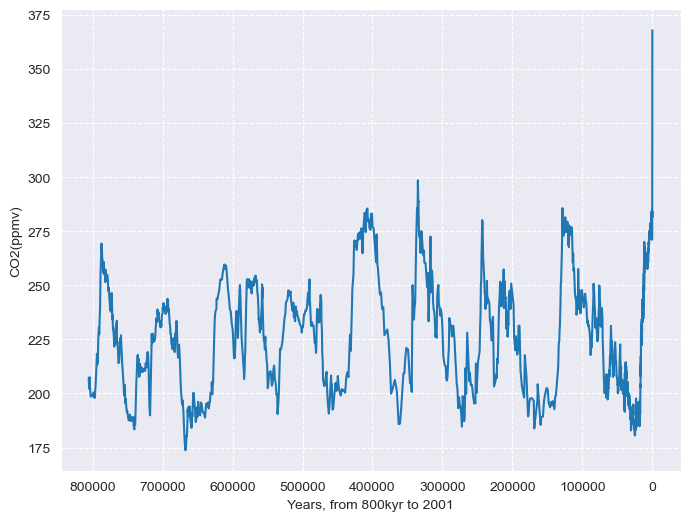

In [6]:
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

sns.lineplot(ipcc, x = "Year", y = "CO2(ppmv)",)
sns.set_style("darkgrid" , {"ytick.major.size": 10 , "ytick.minor.size": 2 , 'grid.linestyle': '--'})
plt.gca().invert_xaxis() # reversing x axis so 2023 is furthest to the right

#sns.regplot(x = ipcc['Year'], y = ipcc['CO2(ppmv)'], scatter=False, color='red', label='Trendline')

#plt.xlim(-800000, 0) # went to 10000 to allow us to see the values in the present day
#plt.ylabel('Atmospheric CO2 levels(ppm)')
plt.xlabel('Years, from 800kyr to 2001')

I want to plot them over lapping each other. First I need to normalise the year values. 

In all of these datasets "present" is the year 1950. I will attempt to normalise them from the year 2023.

Nature goes up to the year 137bp this equates to the year 1813.

In [7]:
nature['Corrected Years'] = 1950 -nature['Year'] #creating a new column with the correct year for each sample
nature = nature.iloc[:, [1, 2]]
nature.head()

,CO2(ppmv),Corrected Years
0,280.4,1813
1,274.9,1682
2,277.9,1671
3,279.1,1555
4,281.9,1546


In [8]:
ipcc['Corrected Years'] = 1950 -(ipcc['Year'].astype(int)) #creating a new column with the correct year for each sample
ipcc = ipcc.iloc[:, [1, 3]]
ipcc.head()


,CO2(ppmv),Corrected Years
0,368.02,2001
1,361.78,1998
2,359.65,1996
3,357.11,1994
4,353.95,1993


Text(0.5, 1.0, 'CO2 Values over Time')

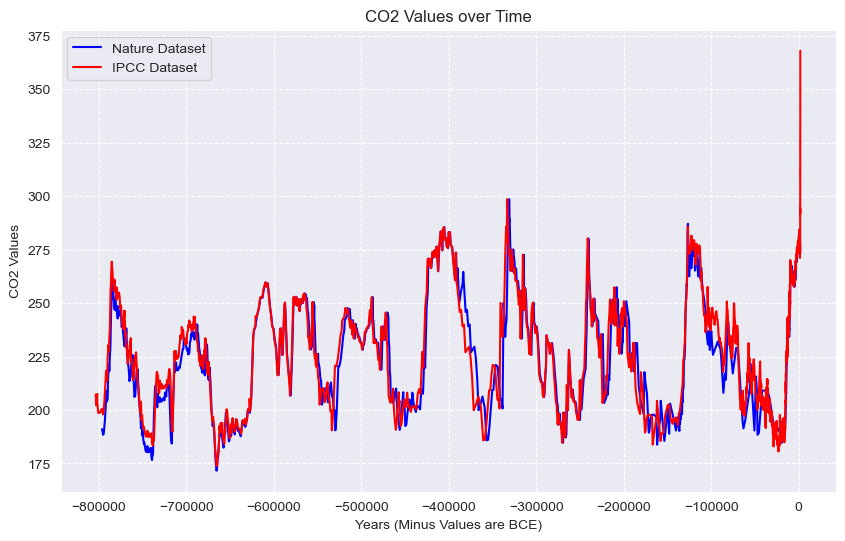

In [9]:
# Assuming 'Time' is the common index in both DataFrames
plt.figure(figsize=(10, 6))

# Plotting using Seaborn lineplot
sns.lineplot(data=nature, x = "Corrected Years", y = "CO2(ppmv)", color='blue', label='Nature Dataset')
sns.lineplot(data=ipcc, x = "Corrected Years", y = "CO2(ppmv)",  color='red', label='IPCC Dataset')

final_x_value = ipcc['Corrected Years'].iloc[-1]

# Set labels and title
plt.xlabel('Years (Minus Values are BCE)')
plt.ylabel('CO2 Values')
plt.title('CO2 Values over Time')

# Show legend
#plt.legend()

We can see the values are very similar and follow the same trend. Some parts of them seem to share the same CO2 values (y-axis value) but the year of sampling (x-axis) is slighty off (eg. between -400kyr and -300kyr). However in some other parts the inverse seems to be true (eg between -800kyr and -700kyr). 

As the IPCC dataset has more 805 more datapoints including both older and more recent years than the Nature dataset, this is the one we will work with going forward.

The IPCC dataset has compiled results from various studies at Law Dome [[ref]](https://agupubs.onlinelibrary.wiley.com/doi/pdfdirect/10.1002/jgrd.50668), Dome C (Dome Concordia),[[ref]](https://agupubs.onlinelibrary.wiley.com/doi/pdfdirect/10.1029/2004GL020338) West Antactic Ice Sheet [[ref]](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2011GB004247), Siple Dome [[ref]](https://www.nature.com/articles/ncomms4723.pdf), EPICA Dronning Maud Land [[ref]](https://agupubs.onlinelibrary.wiley.com/doi/pdfdirect/10.1002/2015PA002874) and Vostok Station [[ref]](https://escholarship.org/content/qt7rx4413n/qt7rx4413n.pdf). All of these locations are in Antartica.


To bring this plot up to modern day (or as close as possible), we first need to find a dataset that has the results for CO2 levels from 2001-2023 in the same location. 

While Antartica has shown a consistent upward trend in CO2 levels the same as the rest of the world, given its remoteness its the last place to register the impacts of increasing emmissions from fossil fuels [[ref]](https://www.noaa.gov/south-pole-last-place-on-earth-to-pass-global-warming-milestone#:~:text=South%20Pole%20is%20last%20place%20on%20Earth%20to%20pass%20global%20warming%20milestone,-Focus%20areas%3A&text=The%20Earth%20passed%20another%20unfortunate,time%20in%204%20million%20years.). Therefore it is important that when comparing data from multiple different studies, the location remains the same. 

The Global Monitiroing Laboratory (GML) of the National Oceanic and Atmospheric Administration (NOAA) produce this data which contains contain atmospheric CO2 Dry Air Mole Fractions measurements at Barrow, Alaska (BRW); Mauna Loa, Hawaii (MLO); American Samoa (SMO); and South Pole (SPO), from 1973-2022. 

These datasets have been downloaded from the GML website[[ref]](https://gml.noaa.gov/aftp/data/trace_gases/co2/in-situ/surface/) as .txt files. For the ease of importing it to this notebook I converted the South Pole file to a csv and saved it as "co2_spo_surface_MonthlyData.csv" in my project folder. 

In [10]:
#reading in the South Pole (spo))dataset

spo_co2 = pd.read_csv('Datasets Used/co2_spo_surface_MonthlyData.csv', skiprows=2) #the data we want begins on line 7
spo_co2 = spo_co2.iloc[:, [1, 2, 10]] 

spo_co2.head()

,year,month,value
0,1974,1,-999.99
1,1974,2,-999.99
2,1974,3,-999.99
3,1974,4,-999.99
4,1974,5,-999.99


According to the Readme for this dataset "Missing data will have a value of -999.99 for the mole fraction."

These need to be removed from the dataset. 

In [11]:
# Replace any instance of -999.99 to NaN which we will then remove
spo_co2.replace(-999.99, pd.NA, inplace=True) 
spo_co2.dropna(inplace=True) #removing NaN values

spo_co2.head()

# https://saturncloud.io/blog/how-to-delete-rows-with-null-values-in-a-specific-column-in-pandas-dataframe/#:~:text=a%20Specific%20Column-,One%20common%20approach%20to%20handle%20null%20values%20is%20to%20delete,values%20in%20the%20specified%20column.
#https://stackoverflow.com/questions/33643843/cant-drop-nan-with-dropna-in-pandas

,year,month,value
12,1975,1,328.19
13,1975,2,328.22
14,1975,3,328.88
22,1975,11,330.6
23,1975,12,329.72


In [12]:
#This dataset has a recorded value for every month. To remain consistent with our previous datasets, this will be averaged into an annual value.

spo_co2 = spo_co2.groupby('year')['value'].mean().reset_index() #averaging monthly values into a singular annual datapoint
spo_co2.head()

,year,value
0,1975,329.122
1,1976,329.769167
2,1977,331.608333
3,1978,333.333636
4,1980,337.076667


Text(0.5, 1.0, 'CO2 Values over Time')

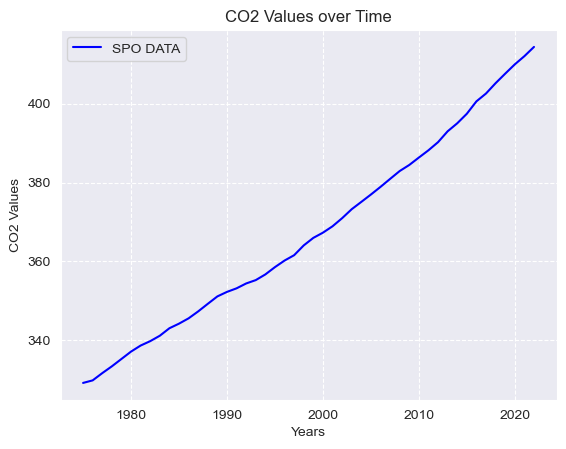

In [13]:
# Plotting using Seaborn lineplot
sns.lineplot(data=spo_co2, x = "year", y = "value", color='blue', label='SPO DATA')


# Set labels and title
plt.xlabel('Years')
plt.ylabel('CO2 Values')
plt.title('CO2 Values over Time')

# Show legend
#plt.legend()

In [14]:
# The IPCC dataset goes up to 2001. However the readings are not consistent, some years are unaccounted for. We are going to append the values of 1975-2022 from the SPO dataset. First we need to cleanse the data so its fits the same format


spo_co2.rename(columns = {'value': 'CO2(ppmv)', 'year': 'Corrected Years'}, inplace=True)
spo_co2 = spo_co2[::-1] # reverse the order so it goes from recent to older. 

spo_co2.head()

,Corrected Years,CO2(ppmv)
46,2022,414.42
45,2021,412.0725
44,2020,409.990833
43,2019,407.631667
42,2018,405.218333


In [15]:
# the ipcc dataset also has double values in some years. I want to only have one value per year so I will average these values.

ipcc = ipcc.groupby('Corrected Years')['CO2(ppmv)'].mean().reset_index()
ipcc.describe()


,Corrected Years,CO2(ppmv)
count,1845.000000,1845.000000
mean,-248229.417344,233.207169
std,275061.496663,33.665086
min,-803718.000000,173.710000
25%,-513700.000000,204.390000
50%,-85631.000000,231.330000
75%,-13370.000000,253.100000
max,2001.000000,368.020000


In [16]:
ipcc_1974 = ipcc.head(1828) # cutting off at 1974
ipcc_1974.head()

,Corrected Years,CO2(ppmv)
0,-803718,207.29
1,-803182,202.23
2,-802572,204.86
3,-802059,207.50
4,-801975,202.92


In [17]:
complete_co2 = pd.concat([ipcc_1974, spo_co2], ignore_index = True)
complete_co2.describe()

,Corrected Years
count,1875.000000
mean,-244225.665600
std,274652.530556
min,-803718.000000
25%,-507412.000000
50%,-78380.000000
75%,-12878.000000
max,2022.000000


Text(0.5, 0, 'Years, from 800kyr to 2022')

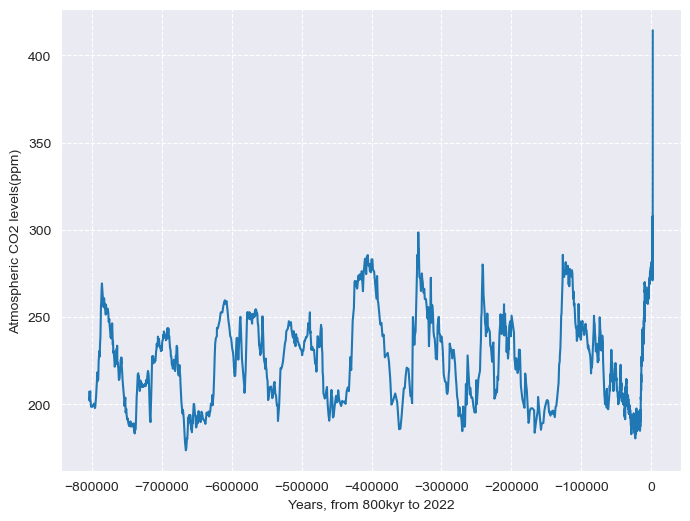

In [18]:
plt.figure(figsize=(8, 6))  

sns.lineplot(complete_co2, x = "Corrected Years", y = "CO2(ppmv)",)
sns.set_style("darkgrid" , {"ytick.major.size": 10 , "ytick.minor.size": 2 , 'grid.linestyle': '--'})

plt.ylabel('Atmospheric CO2 levels(ppm)')
plt.xlabel('Years, from 800kyr to 2022')

We now have a dataset for CO2 levels in Antartica going from 800kyr ago right up to 2022.

While the industrial revolution began in the mid 1700s, [[ref]](https://en.wikipedia.org/wiki/Industrial_Revolution) this was localised to Britian and it wasnt until the 1830s-1840s that it had spread around the western hemisphere. While heavy industry and use of fossil fuels were still in their infancy on a global scale, we can use this as a point of division to compare before and after.

In [19]:
#complete_co2.head(1741) 
pre_inds_rev = complete_co2.head(1741) #from 800kyr be to 1841ce
pre_indust_average = pre_inds_rev["CO2(ppmv)"].mean()

#complete_co2.tail(134)
post_inds_rev = complete_co2.tail(134) # from 1844-2022
present_average = post_inds_rev["CO2(ppmv)"].mean()

increase = float((pre_indust_average/present_average)*100)

print(f'The average atmospheric CO2 levels from 800kyr bp up until 1840 was {pre_indust_average:.2f}ppm. While in the period 1841-2023 the average atmospheric CO2 levels had risen to {present_average:.2f}ppm, an increase of {increase:.2f}%')

The average atmospheric CO2 levels from 800kyr bp up until 1840 was 228.64ppm. While in the period 1841-2023 the average atmospheric CO2 levels had risen to 325.33ppm, an increase of 70.28%


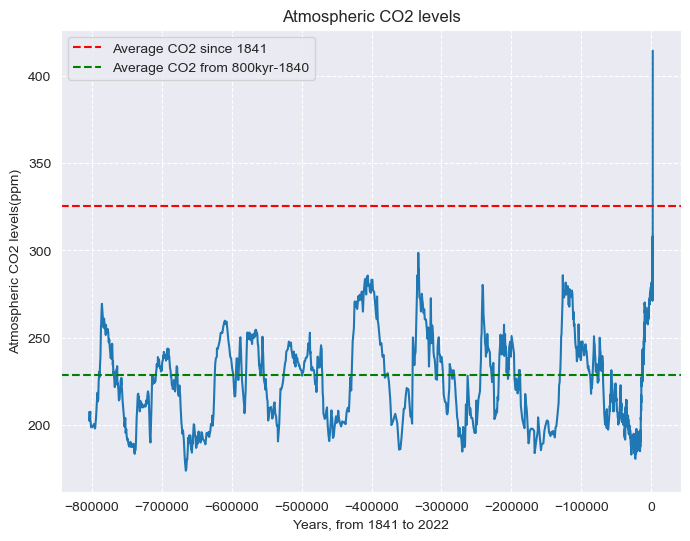

In [20]:
plt.figure(figsize=(8, 6))  

sns.lineplot(complete_co2, x = "Corrected Years", y = "CO2(ppmv)",)
sns.set_style("darkgrid" , {"ytick.major.size": 10 , "ytick.minor.size": 2 , 'grid.linestyle': '--'})

plt.axhline(y=present_average, color='red', linestyle= '--', label='Average CO2 since 1841')
plt.axhline(y=pre_indust_average, color='green', linestyle= '--', label='Average CO2 from 800kyr-1840')
plt.ylabel('Atmospheric CO2 levels(ppm)')
plt.xlabel('Years, from 1841 to 2022')
plt.title("Atmospheric CO2 levels")
plt.legend()

# https://www.statology.org/matplotlib-average-line/

In the above plot we can see the average CO2 levels for the last 800k years. To highlight the massive increase since the industrial revolution I have added the pre-industrial CO2 average as a dashed green line and the post-industrial revolution average. This is an increase of 70.3%

# Temperature

The concentration of greenhouse gases can be determined directly from the ice core samples. Bubbles of air in the ice can be examined to determine the make-up of this air. You cannot do the same for temperature.  However, the temperature at the time can be inferred by the isotopic composisiotn of the water molecules released by melting the ice core [[ref]](https://www.scientificamerican.com/article/how-are-past-temperatures/).

"The isotopes of particular interest for climate studies are 16O (with 8 protons and 8 neutrons that makes up 99.76 percent of the oxygen in water) and 18O (8 protons and 10 neutrons), together with 1H (with one proton and no neutrons, which is 99.985 percent of the hydrogen in water) and 2H (also known as deuterium (D), which has one proton and one neutron). All of these isotopes are termed 'stable' because they do not undergo radioactive decay" [[ref]](https://www.scientificamerican.com/article/how-are-past-temperatures/).

The ratio of these isotopes can be determined using mass spectrometry and compared against current ocean water (Standard Mean Ocean Water - SMOW).

Ice- sheets (from which the core samples are taken) were formed from years and years of accumulating snowfall.  The weight of the snow compresses the previous layers which turns it into glacial ice. [[ref]](https://www.google.com/search?q=ice+cores+formation&oq=ice+cores+formation&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTIGCAEQLhhA0gEINDE1MGowajmoAgCwAgA&sourceid=chrome&ie=UTF-8)

As 18O and D are the heavier isotopes, a water molecule made up of them takes more energy to evaporate. Water molecules in the ice cores always have less of these isotopes than SMOW as a result. However, during cold periods, (less energy) these levels are even lower. Scientists have established an almost linear relationship between the levels of 18O and D and the mean annual temperature. 

 As previously mentioned there are multiple different projects sampling ice cores. This has lead to 'temporal divergences' of up to several thousand years.  The Antarctic Ice Core Chronology 2012 (AICC2012) used "the Bayesian tool Datice (Lemieux-Dudon et al., 2010) that combines glaciological inputs and data constraints, including a wide range of relative and absolute gas and ice stratigraphic markers" [[ref]](https://cp.copernicus.org/articles/9/1733/2013/cp-9-1733-2013.pdf) to produce a coherent timescale for the cores taken from Vostok, EPICA Dome C (EDC), EPICA Dronning Maud Land (EDML) and Talos Dome (TALDICE).

In [21]:
#reading in the dataset

aicc = pd.read_csv('Datasets Used/epicaDC.deuttemp.EDC3-AICC.csv', encoding='latin-1') 

# When first attempting to read int the CSV file i was getting the following error;
# "UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 14: invalid continuation byte"
# After some experimentation and research I determined it was the accented e in 'EDC3béta' that was causing this issue. 
# To get around this I used the encoding latin-1, instead. 

In [22]:
aicc.head(25) # check the data looks as expected

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
0,1,0.00,-50.000000,-55.000000,NaN,218.3,3.105321
1,2,0.55,-43.559770,-50.513333,NaN,218.3,3.104805
2,3,1.10,-37.440190,-46.026667,NaN,218.3,3.104404
3,4,1.65,-31.641560,-41.540000,NaN,218.3,3.104025
4,5,2.20,-24.552780,-34.516667,NaN,218.3,3.103453
5,6,2.75,-17.784220,-27.493333,NaN,218.3,3.102677
6,7,3.30,-11.013050,-20.470000,NaN,218.3,3.101557
7,8,3.85,-3.270300,-12.213333,NaN,218.3,3.099708
8,9,4.40,5.447842,-3.956667,NaN,218.3,3.096691
9,10,4.95,13.529990,4.300000,NaN,218.3,3.092812


For the reasons stated above AICC2012 will be the timescale we use. As in all of these studies the year 0 is 1950. I will now clean the data so it is fit for our purposes. 

In [23]:
# Cleansing the data

aicc = aicc.iloc[:, [3, 4, 5, 6]] 
aicc

,AICC2012,deutfinal,temp,acc-EDC3beta
0,-55.000000,NaN,218.3,3.105321
1,-50.513333,NaN,218.3,3.104805
2,-46.026667,NaN,218.3,3.104404
3,-41.540000,NaN,218.3,3.104025
4,-34.516667,NaN,218.3,3.103453
...,...,...,...,...
5814,817562.000000,-432.2,211.0,1.529000
5815,818631.000000,-431.4,211.2,1.548000
5816,819700.000000,-430.3,211.3,1.576000
5817,820769.000000,-429.8,211.4,1.589000


In [24]:
aicc['AICC2012'] = 1950 - (aicc['AICC2012']) # converting them into real years. 
aicc['temp'] = aicc['temp'] - 273.15  # coverting from Kelvin to Celsius
aicc.rename(columns = {'AICC2012': 'Corrected Years', 'deutfinal': 'D'}, inplace=True)
aicc.head()

,Corrected Years,D,temp,acc-EDC3beta
0,2005.000000,NaN,-54.85,3.105321
1,2000.513333,NaN,-54.85,3.104805
2,1996.026667,NaN,-54.85,3.104404
3,1991.540000,NaN,-54.85,3.104025
4,1984.516667,NaN,-54.85,3.103453


Text(0.5, 0, 'Years, from 800kyr to 2005')

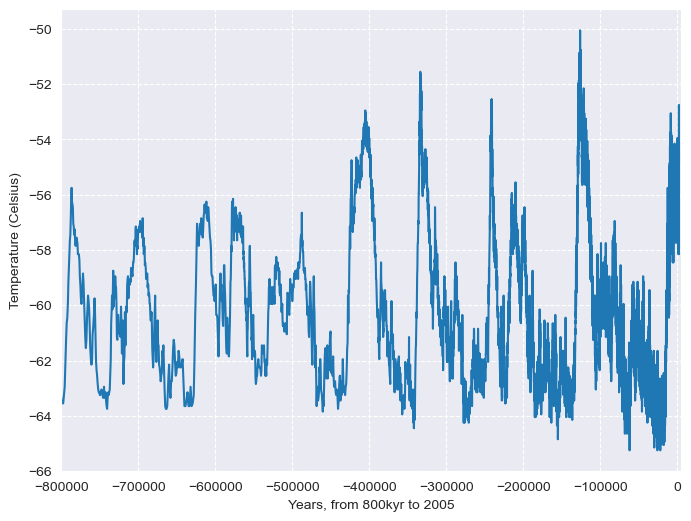

In [25]:
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

sns.lineplot(aicc, x = "Corrected Years", y = "temp",)
sns.set_style("darkgrid" , {"ytick.major.size": 10 , "ytick.minor.size": 2 , 'grid.linestyle': '--'})
plt.xlim(-800000, 5000) # went to 10000 to allow us to see the values in the present day
plt.ylabel('Temperature (Celsius)')
plt.xlabel('Years, from 800kyr to 2005')

A temperature anomaly is the difference from an average/baseline temperature [[ref]](https://www.ncei.noaa.gov/access/monitoring/dyk/anomalies-vs-temperature).

To find a baseline temperature we need to find the average temperature over a period of years. To avoid any major impact of the industrial revolution I will pick the period 1800-1900.

In [26]:
baseline_start =1800
baseline_end = 1900

bs_df = aicc[(aicc['Corrected Years'] >= baseline_start) & (aicc['Corrected Years'] <= baseline_end)] 
bs_df.head(20)   # a new dataframe with all years between 1800 and 1900

#https://www.statology.org/and-operator-in-pandas/

,Corrected Years,D,temp,acc-EDC3beta
15,1892.950000,-394.1,-55.45,3.027896
16,1883.620000,-398.7,-56.15,3.011312
17,1874.290000,-395.9,-55.75,2.994881
18,1864.960000,-395.9,-55.75,2.924870
19,1855.136667,-399.3,-56.25,2.678806
20,1845.313333,-391.4,-54.95,2.668117
21,1835.490000,-399.5,-56.35,2.660774
22,1825.326667,-402.9,-56.85,2.656270
23,1815.163333,-393.9,-55.35,2.655582
24,1805.000000,-398.6,-56.15,2.659589


In [27]:
baseline= bs_df['temp'].mean()

aicc['Anomaly'] = aicc['temp'] - baseline
aicc.head()

,Corrected Years,D,temp,acc-EDC3beta,Anomaly
0,2005.000000,NaN,-54.85,3.105321,1.05
1,2000.513333,NaN,-54.85,3.104805,1.05
2,1996.026667,NaN,-54.85,3.104404,1.05
3,1991.540000,NaN,-54.85,3.104025,1.05
4,1984.516667,NaN,-54.85,3.103453,1.05


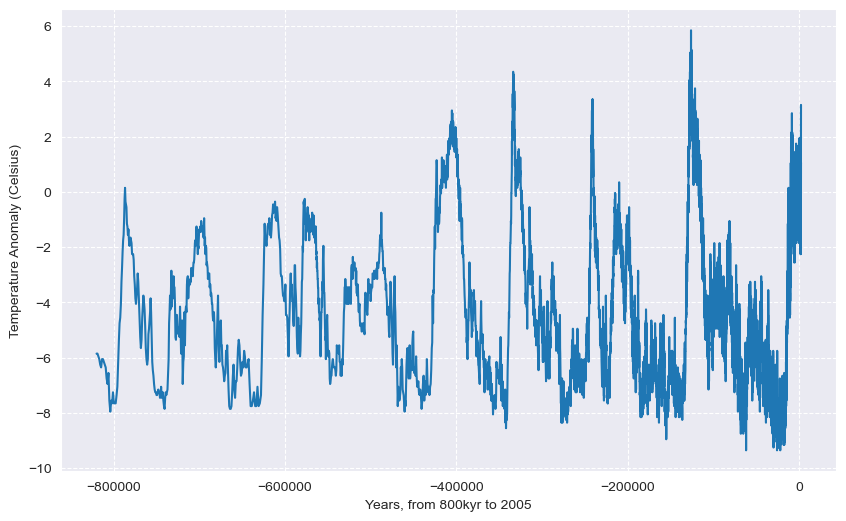

In [28]:
plt.figure(figsize=(10, 6))  

sns.lineplot(aicc, x = "Corrected Years", y = "Anomaly",)
sns.set_style("darkgrid" , {"ytick.major.size": 10 , "ytick.minor.size": 2 , 'grid.linestyle': '--'})
#plt.xlim(-800000, 5000) # went to 10000 to allow us to see the values in the present day
plt.ylabel('Temperature Anomaly (Celsius)')
plt.xlabel('Years, from 800kyr to 2005')
plt.grid(True)



c:\Users\kolea\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  func(*args, **kwargs)
c:\Users\kolea\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


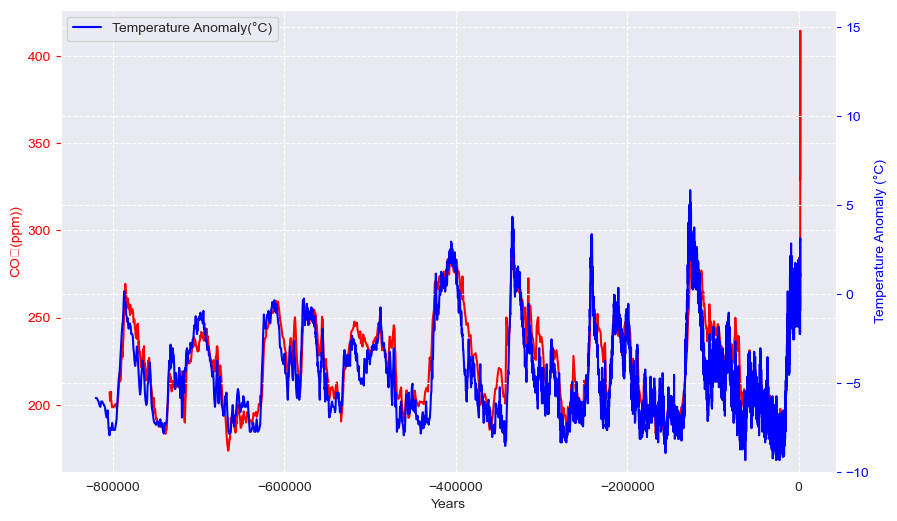

In [29]:
# Plot both CO2 and temp on the same plot with two y axis

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the first dataset on the primary y-axis (left)
ax1.plot(complete_co2['Corrected Years'], complete_co2['CO2(ppmv)'], "red", label= "CO\u2082(ppm)") #https://www.geeksforgeeks.org/how-to-print-superscript-and-subscript-in-python/
ax1.set_xlabel('Years')
ax1.set_ylabel('CO\u2082(ppm))', color='red')
ax1.tick_params('y', colors='red')
#ax1.get_legend_handles_labels()

# Creating a secondary y-axis (right)
ax2 = ax1.twinx()

# Plotting the second dataset on the secondary y-axis (right)
ax2.plot(aicc['Corrected Years'], aicc['Anomaly'], 'blue', label='Temperature Anomaly(\u00b0C)') #https://www.htmlsymbols.xyz/unicode/U+00B0
ax2.set_ylabel('Temperature Anomaly (\u00b0C)', color='b')
ax2.set_ylim(-10, 16) # had to play around with the scale of the y-axis so it looked better next to CO2
ax2.tick_params('y', colors='b')
#ax2.get_legend_handles_labels()

# Displaying legends for both datasets
#lines_1, labels_1 = ax1.get_legend_handles_labels()
#lines_2, labels_2 = ax2.get_legend_handles_labels()
#lines = lines_1 + lines_2
#labels = labels_1 + labels_2
plt.legend(loc='upper left')

#Should add mauna loa data to bring it up to present to aicc/temp database

# Methane

The epa.gov website has provided a compiled dataset for Methane levels from 800Kyr bp up until 2021

https://www.epa.gov/system/files/other-files/2022-07/ghg-concentrations_fig-2.csv

In [30]:
#reading in the dataset

methane = pd.read_csv('Datasets Used/ch4-ghg-concentrations_fig-2.csv', skiprows=7) 
methane.rename(columns={'Ice core measurements':'Corrected Years', 'Unnamed: 1':'EPICA', 'Unnamed: 2':'Law Dome', 'Unnamed: 3':'Cape Grim, Australia', 'Unnamed: 4':'Mauna Loa, Hawaii','Unnamed: 5': 'Shetland Islands, Scotland'}, inplace=True)
methane = methane.drop(labels =2175, axis=0) #There is a break in the compiled datasets when  it moves from ice core samples to direct measurements. i want to remove ths. 
methane['Corrected Years'] =methane['Corrected Years'].astype(float) #trying to remove decimals but get an error message when converting to int. 
methane['Corrected Years'] =methane['Corrected Years'].astype(int) #however it will allow me to convert to float first and then back to int
methane.tail(140) #checking it looks as expected


,Corrected Years,EPICA,Law Dome,"Cape Grim, Australia","Mauna Loa, Hawaii","Shetland Islands, Scotland",Unnamed: 6
2073,732,642.659181,NaN,NaN,NaN,NaN,NaN
2074,818,643.700000,NaN,NaN,NaN,NaN,NaN
2075,858,633.223011,NaN,NaN,NaN,NaN,NaN
2076,912,634.700000,NaN,NaN,NaN,NaN,NaN
2077,1003,636.214393,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2209,2017,NaN,NaN,1798.62,1865.50,NaN,NaN
2210,2018,NaN,NaN,1810.81,1871.53,NaN,NaN
2211,2019,NaN,NaN,1816.61,1882.55,NaN,NaN
2212,2020,NaN,NaN,1824.70,1891.47,NaN,NaN


The EPICA dataset has methane values from year 797,446 bc up to 1936 ce. The Law-Dome dataset covers from 1008 ce to 1980ce and it has more datapoints for the overlapping years than EPICA. Mauna Loa has consistent datapoints since 1984. Therefore I will stitch togehter my own timeline as follows;

- 800,000bc - 1003ce - EPICA
- 1008ce    - 1980ce - Law Dome
- 1984      - 2022ce -  Mauna Loa

In [31]:
methane = methane.iloc[:, [0, 1, 2, 4]] # removing other columns



In [32]:
methane.loc[2078:, 'EPICA'] = np.nan # row 2077 will be the final value from EPICA. replaced everything else with NaN
methane.tail(139)

,Corrected Years,EPICA,Law Dome,"Mauna Loa, Hawaii"
2074,818,643.700000,NaN,NaN
2075,858,633.223011,NaN,NaN
2076,912,634.700000,NaN,NaN
2077,1003,636.214393,NaN,NaN
2078,1008,NaN,666.0,NaN
...,...,...,...,...
2209,2017,NaN,NaN,1865.50
2210,2018,NaN,NaN,1871.53
2211,2019,NaN,NaN,1882.55
2212,2020,NaN,NaN,1891.47


In [33]:
#Creating another column with that will have a combined timeline

methane['Average'] = methane[['EPICA', 'Law Dome', 'Mauna Loa, Hawaii']].mean(axis=1)
methane.tail(100)

,Corrected Years,EPICA,Law Dome,"Mauna Loa, Hawaii",Average
2113,1681,NaN,692.0,NaN,692.00
2114,1691,NaN,NaN,NaN,NaN
2115,1694,NaN,676.1,NaN,676.10
2116,1722,NaN,671.9,NaN,671.90
2117,1742,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2209,2017,NaN,NaN,1865.50,1865.50
2210,2018,NaN,NaN,1871.53,1871.53
2211,2019,NaN,NaN,1882.55,1882.55
2212,2020,NaN,NaN,1891.47,1891.47


Text(0.5, 1.0, 'Atmospheric Methane Levels over the last 800 thousand years')

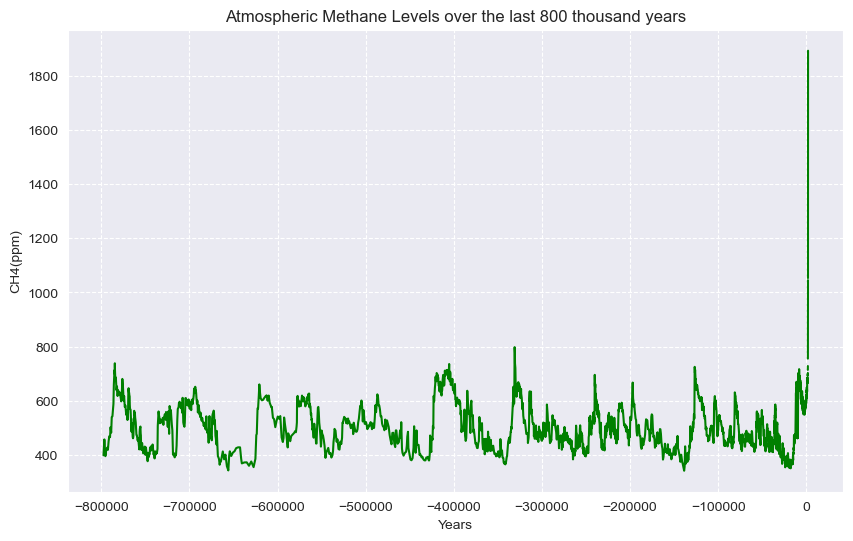

In [34]:
#Plotting Methane levels in one continuous plot

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the average data
ax1.plot(methane['Corrected Years'], methane['Average'], 'green', label= "Average") #https://www.geeksforgeeks.org/how-to-print-superscript-and-subscript-in-python/
ax1.set_xlabel('Years')
ax1.set_ylabel('CH4(ppm)')
plt.title("Atmospheric Methane Levels over the last 800 thousand years")


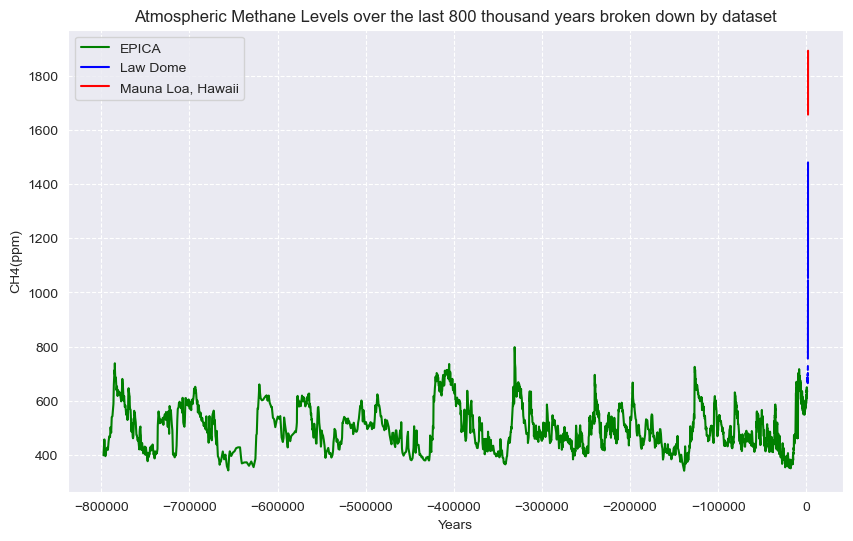

In [35]:
# Breakind down the Methan plot by dataset

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(10, 6))


# Plotting the EPICA dataset
ax1.plot(methane['Corrected Years'], methane['EPICA'], 'green', label= "EPICA") #https://www.geeksforgeeks.org/how-to-print-superscript-and-subscript-in-python/
ax1.set_xlabel('Years')
ax1.set_ylabel('CH4(ppm)')
#ax1.get_legend_handles_labels()

# Plotting the Law Dome dataset
ax1.plot(methane['Corrected Years'], methane['Law Dome'], 'blue', label='Law Dome') #https://www.htmlsymbols.xyz/unicode/U+00B0

# Plotting the Mauna Loa dataset 
ax1.plot(methane['Corrected Years'], methane['Mauna Loa, Hawaii'], 'red', label='Mauna Loa, Hawaii') #https://www.htmlsymbols.xyz/unicode/U+00B0

plt.title("Atmospheric Methane Levels over the last 800 thousand years broken down by dataset")
plt.legend(loc='upper left')

Looking at the above graph we can see a break in datapoints between approx 1400ppm and 1650ppm. This is when values diverged from Ice core samples to direct measurements. 

Text(0.5, 1.0, 'Atmospheric CO2 and CH4 levels')

c:\Users\kolea\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  func(*args, **kwargs)
c:\Users\kolea\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


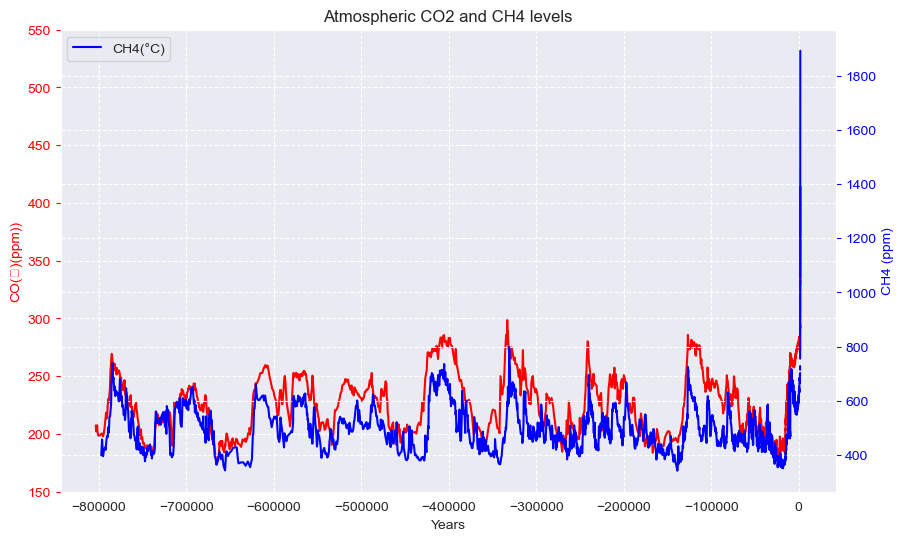

In [36]:
# Plot CO2 and CH4 on same graph

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the CO2 dataset on the primary y-axis (left)
ax1.plot(complete_co2['Corrected Years'], complete_co2['CO2(ppmv)'], "red", label= 'CO(\u2082)(ppm)') 
ax1.set_xlabel('Years')
ax1.set_ylabel('CO(\u2082)(ppm))', color='red')
ax1.set_ylim(150, 550) # had to play around with y values so it looked nicer compated to CO2
ax1.tick_params('y', colors='red')


# Creating a secondary y-axis (right)
ax2 = ax1.twinx()

# Plotting the second dataset on the secondary y-axis (right)
ax2.plot(methane['Corrected Years'], methane['Average'], 'blue', label='CH4(\u00b0C)') 
ax2.set_ylabel('CH4 (ppm)', color='b')
ax2.tick_params('y', colors='b')
#ax2.get_legend_handles_labels()

plt.legend(loc='upper left')
plt.title("Atmospheric CO2 and CH4 levels")

Text(0.5, 1.0, 'Atmospheric CH4 levels and Temperature Anomaly over 800,000 years')

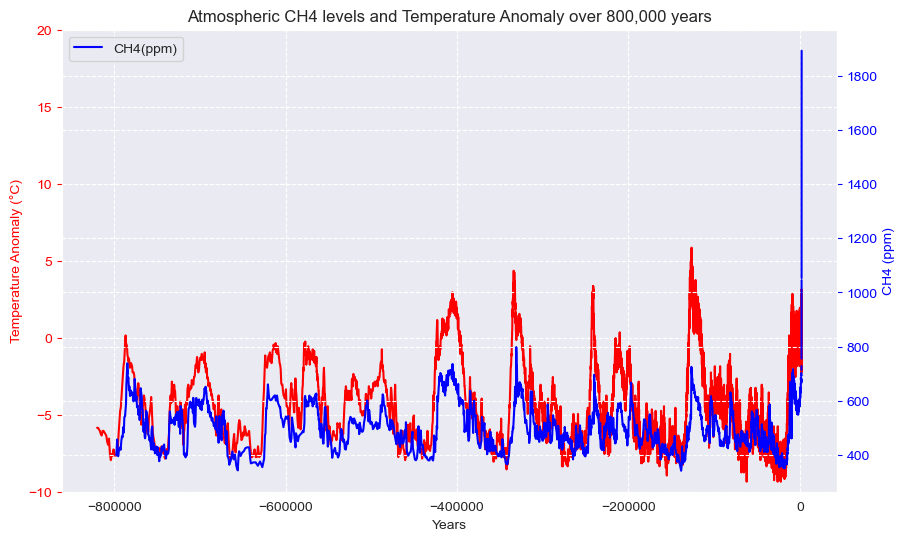

In [37]:
# Plot CH4 and Temperature CH4 on same graph

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the CO2 dataset on the primary y-axis (left)
ax1.plot(aicc['Corrected Years'], aicc['Anomaly'], "red", label= 'Temperature Anomaly') 
ax1.set_xlabel('Years')
ax1.set_ylabel('Temperature Anomaly (\u00b0C)', color='red')
ax1.set_ylim(-10, 20)
ax1.tick_params('y', colors='red')


# Creating a secondary y-axis (right)
ax2 = ax1.twinx()

# Plotting the second dataset on the secondary y-axis (right)
ax2.plot(methane['Corrected Years'], methane['Average'], 'blue', label='CH4(ppm)') 
ax2.set_ylabel('CH4 (ppm)', color='b')
ax2.tick_params('y', colors='b')
#ax2.get_legend_handles_labels()

plt.legend(loc='upper left')
plt.title("Atmospheric CH4 levels and Temperature Anomaly over 800,000 years")

In [38]:
#we have some Nan values in the Average Column stemming from our merge. These will be removed

methane['Average'] = methane['Average'].dropna
methane.tail(100)

,Corrected Years,EPICA,Law Dome,"Mauna Loa, Hawaii",Average
2113,1681,NaN,692.0,NaN,<bound method Series.dropna of 0 399.30...
2114,1691,NaN,NaN,NaN,<bound method Series.dropna of 0 399.30...
2115,1694,NaN,676.1,NaN,<bound method Series.dropna of 0 399.30...
2116,1722,NaN,671.9,NaN,<bound method Series.dropna of 0 399.30...
2117,1742,NaN,NaN,NaN,<bound method Series.dropna of 0 399.30...
...,...,...,...,...,...
2209,2017,NaN,NaN,1865.50,<bound method Series.dropna of 0 399.30...
2210,2018,NaN,NaN,1871.53,<bound method Series.dropna of 0 399.30...
2211,2019,NaN,NaN,1882.55,<bound method Series.dropna of 0 399.30...
2212,2020,NaN,NaN,1891.47,<bound method Series.dropna of 0 399.30...


# Irish Temperature

As part of the Ireland Long-term Maximum and Minimum Air Temperature (ILMMT) dataset [[ref]](https://www.met.ie/climate/available-data/long-term-data-sets) there are a series of datasets recording Min (°C) and Max (°C) temperatures at a number of different stations throughout Ireland going from the 1830s up to the late 1950s. For more modern data met.ie has compiled datasets bringing this up to modern day. 

I could not find any source that had previously compiled the data from the different weather stations into one document. In order to get a representative picture of the full island I have selected 3 stations Phoenix Park (East), Malin Head (North), and Markree (West). While there more stations these complete. In addition in other stations they seem to measure temperature at specific times of the day as opposed to the Max/mins. 

In [39]:
phoenix = pd.read_csv('Datasets Used/Phoenix Park Dublin_1831-1958.csv', usecols=[0, 1, 2, 5, 6], encoding= 'latin-1') # dont need faranheit columns, the degress symbol was cauising na error wiht utf-8 so I changed the encoding to latin-1
phoenix = phoenix.groupby(['Year', 'Month'])[['Max (°C)', 'Min (°C)']].mean().reset_index() # getting an average for each month

phoenix['Mean'] = phoenix[['Max (°C)', 'Min (°C)']].mean(axis=1) # adding another column with the mean monthly value
#phoenix.head(280) #checking it looks as expected
annual_phoenix = phoenix.groupby('Year')['Mean'].mean().reset_index()
annual_phoenix.head(25)

,Year,Mean
0,1831,10.771441
1,1832,10.437295
2,1833,10.730021
3,1834,14.312648
4,1835,11.424772
5,1836,10.193009
6,1837,10.075601
7,1838,9.193793
8,1839,8.400847
9,1840,8.478218


Text(0.5, 0, 'Years')

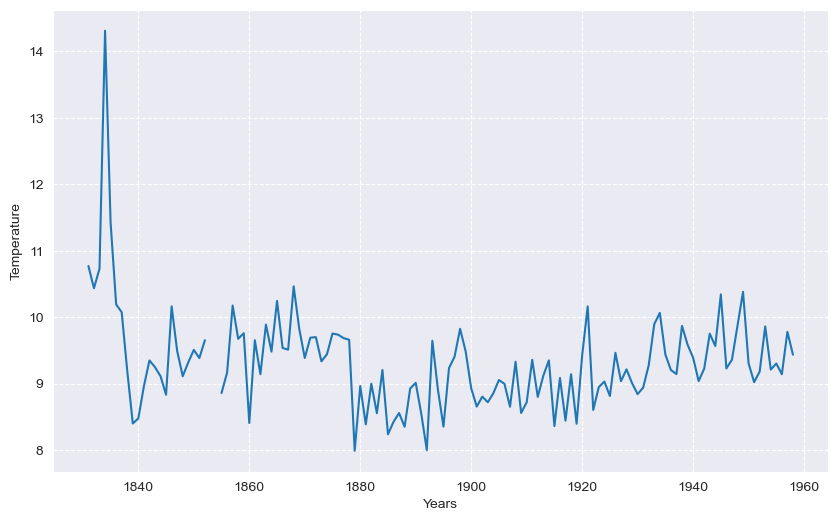

In [40]:
#Annual Mean Temperature from 1831-1958 in Phoenix Park Meteorlogical Station

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(annual_phoenix['Year'], annual_phoenix['Mean'])
ax1.set_ylabel("Temperature")
ax1.set_xlabel("Years")

From a quick look at the above graph we can see there is something wrong with the data in the mid 1830s. The average peaks at 14 degrees in one year which is way out line in comparison to every other year. 

Upon reviewing the dataset again, it appears in 1834 and 1835 only the maximum temperatures were recorded. There are no values for 'Min'. In order to compensate for this we will ignore these years in the dataset going forward. 

There is also a gap for years 1853 + 1854. The Metadata that was available with this dataset says the following;

"No traceable handwritten registers of continuous daily maximum and minimum air temperature observations.
No monthly or annual averages of maximum and minimum air temperature in the period 1853-1854 are available in James (1862)."

These 4 years will be removed from the dataset. 


In [41]:

annual_phoenix= annual_phoenix.drop([3, 4, 22, 23]) # 1834 was at index 3, 1853 and 1854 were index 22 and 23 respectively. They have now been removed
annual_phoenix.head(30)

,Year,Mean
0,1831,10.771441
1,1832,10.437295
2,1833,10.730021
5,1836,10.193009
6,1837,10.075601
7,1838,9.193793
8,1839,8.400847
9,1840,8.478218
10,1841,8.960772
11,1842,9.350333


In [42]:
malin = pd.read_csv('Datasets Used/Malin Head_1885-1958.csv', usecols=[0, 1, 2, 5, 6], encoding= 'latin-1') # dont need faranheit columns, the degress symbol was cauising na error wiht utf-8 so I changed the encoding to latin-1
malin = malin.groupby(['Year', 'Month'])[['Max (°C)', 'Min (°C)']].mean().reset_index() # getting an average for each month


malin['Mean'] = malin[['Max (°C)', 'Min (°C)']].mean(axis=1) # adding another column with the mean monthly value
malin.head(280) #checking it looks as expected
annual_malin = malin.groupby('Year')['Mean'].mean().reset_index()
annual_malin.tail(25)

,Year,Mean
46,1931,9.324660
47,1932,9.606390
48,1933,9.783999
49,1934,9.499958
50,1935,9.189576
51,1936,9.336750
52,1937,9.320171
53,1938,9.517813
54,1939,9.182385
55,1940,8.953216


In [43]:
markree = pd.read_csv('Datasets Used/Markree_1850-1968.csv', usecols=[0, 1, 2, 5, 6], encoding= 'latin-1') # dont need faranheit columns, the degress symbol was cauising na error wiht utf-8 so I changed the encoding to latin-1
markree = markree.groupby(['Year', 'Month'])[['Max (°C)', 'Min (°C)']].mean().reset_index() # getting an average for each month

markree['Mean'] = markree[['Max (°C)', 'Min (°C)']].mean(axis=1) # adding another column with the mean monthly value
#markree.head(280) #checking it looks as expected
annual_markree = markree.groupby('Year')['Mean'].mean().reset_index()

# For the year 1856, the only temps recorded were in Jan+Feb, throwing the average annual temp off. as such i will remove the years values
# Same for 1852
# Same for 194 only months recorded are Nov+Dec 

annual_markree.at[6, 'Mean'] = np.nan # 1856
annual_markree.at[24, 'Mean'] = np.nan # 1974
annual_markree.at[2, 'Mean'] = np.nan # 1852
annual_markree.head(25)

,Year,Mean
0,1850,7.613199
1,1851,9.797130
2,1852,NaN
3,1853,NaN
4,1854,NaN
5,1855,9.251573
6,1856,NaN
7,1857,NaN
8,1858,NaN
9,1859,NaN


In [44]:
# Created a new dataset by merging the above 3 datasets. 

#The merge was only including rows that had a value in all dataframes. how='outer' should include all rows even if the other dataframes are missing a value. 
all_ireland_until_1950s =  pd.merge(annual_phoenix, annual_malin, on='Year', how='outer')
all_ireland_until_1950s =pd.merge(all_ireland_until_1950s, annual_markree, on='Year', how='outer')
all_ireland_until_1950s.head(50)

,Year,Mean_x,Mean_y,Mean
0,1831,10.771441,NaN,NaN
1,1832,10.437295,NaN,NaN
2,1833,10.730021,NaN,NaN
3,1836,10.193009,NaN,NaN
4,1837,10.075601,NaN,NaN
5,1838,9.193793,NaN,NaN
6,1839,8.400847,NaN,NaN
7,1840,8.478218,NaN,NaN
8,1841,8.960772,NaN,NaN
9,1842,9.350333,NaN,NaN


In [45]:
#Now we can get an approximate national figure for annual mean temperature
all_ireland_until_1950s["Annual Average Temperature"] = all_ireland_until_1950s[['Mean_x',	'Mean_y',	'Mean']].mean(axis=1)
#all_ireland_until_1950s.tail(50)

all_ireland_until_1950s= all_ireland_until_1950s.drop([124, 125]) # No dataset has values for year 1853 or 1854.
all_ireland_until_1950s= all_ireland_until_1950s.iloc[:, [0, 4]]
all_ireland_until_1950s.tail(50)

,Year,Annual Average Temperature
84,1919,8.459856
85,1920,9.244283
86,1921,10.031206
87,1922,8.589137
88,1923,8.838376
89,1924,9.001726
90,1925,8.724911
91,1926,9.438442
92,1927,8.980044
93,1928,9.108216


Text(0.5, 1.0, 'Approximate mean annual temperature for all of ireland 1831-1968')

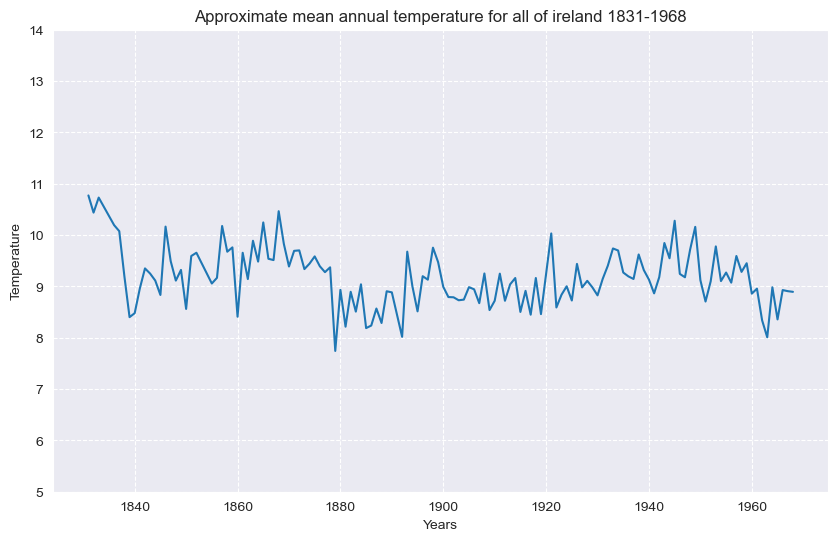

In [46]:
#Approx annual Mean Temperature from 1831-1958 for all of ireland

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(all_ireland_until_1950s['Year'], all_ireland_until_1950s['Annual Average Temperature'])
ax1.set_ylabel("Temperature")
ax1.set_xlabel("Years")
ax1.set_ylim(5, 14)

plt.title("Approximate mean annual temperature for all of ireland 1831-1968")

**1958 - Present**

On the CSO website[[ref]](https://data.cso.ie/) they have available all temperature records from 15 different weather stations around Ireland going back to 1958. I will upload this dataset below. The date information has year and month written in one cell, in the format "yyyyMmm" eg.1958M01. I will split this into 2 cells: year and month. 


In [47]:
ire_temp = pd.read_csv('Datasets Used/Ireland_temp_1958-2022.csv', usecols=[1, 2, 4])

# create a time series instead of yyyyMmm

ire_temp['Month'] = ire_temp['Month'].str.replace('M', '-')
ire_temp['Date'] = pd.to_datetime(ire_temp['Month'], format='%Y-%m') # create a time series
#ire_temp['Year'] = (ire_temp['Month'].str.slice(0,4)).astype(int)
#ire_temp['Months'] = (ire_temp['Month'].str.slice(5, 7)).astype(int)
ire_temp= ire_temp.drop(columns= 'Month')
ire_temp.head()

,Meteorological Weather Station,VALUE,Date
0,Belmullet,5.9,1958-01-01
1,Birr,5.0,1958-01-01
2,Valentia Observatory,7.1,1958-01-01
3,Casement,NaN,1958-01-01
4,Claremorris,4.4,1958-01-01


In [48]:
ire_temp.rename(columns={'VALUE': 'Mean'}, inplace=True)
ire_temp = ire_temp.groupby('Date')['Mean'].mean().reset_index() # Get an all ireland monthly mean temperature by averaing the values from each station. 
#ire_temp['Year'].astype(int)
#ire_temp['Date'] = pd.to_datetime(ire_temp[['Year', 'Months']].assign(DAY=1))
ire_temp.tail(20)

,Date,Mean
760,2021-05-01,9.73
761,2021-06-01,13.69
762,2021-07-01,16.74
763,2021-08-01,15.51
764,2021-09-01,15.10
765,2021-10-01,11.96
766,2021-11-01,8.82
767,2021-12-01,7.59
768,2022-01-01,6.76
769,2022-02-01,7.37


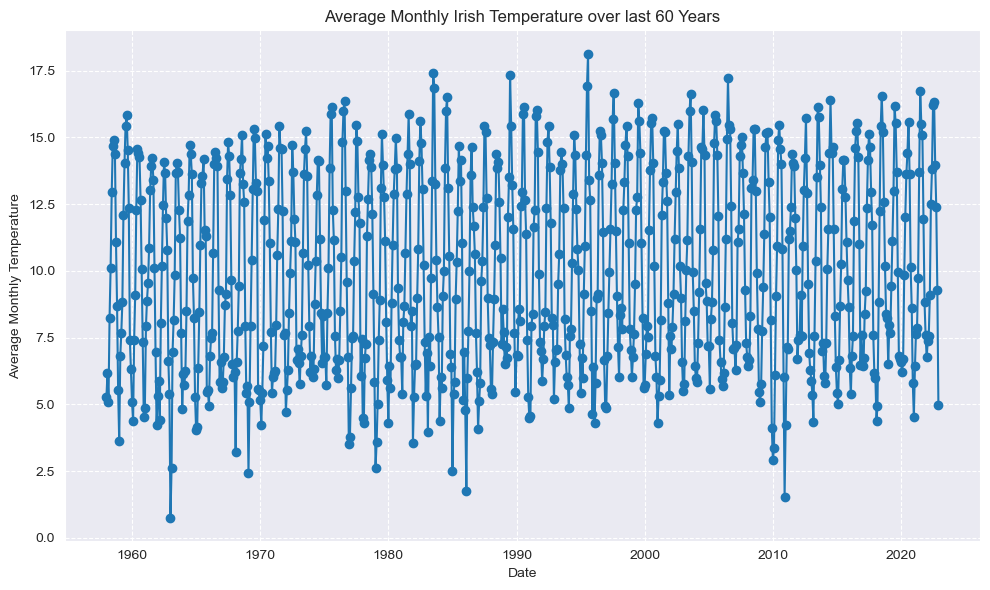

In [49]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.plot(ire_temp['Date'], ire_temp['Mean'], marker='o', linestyle='-')

plt.xlabel('Date')
plt.ylabel('Average Monthly Temperature')
plt.title('Average Monthly Irish Temperature over last 60 Years')

plt.tight_layout()
plt.show()

The above plot shows the average temperatures for all months since 1958. There are 12 datapoints for each year which leads to it being incredibly noisey and very difficult to draw any conclusions from. In order to get around this but still show the annual fluctuations, I will break them into the seasons. In order to do this I need to create a function which will iterate through our time series and designate a value of Spring, Summer, Autumn or Winter into a new column.

In [50]:
#Function that will assign a season based on the month value

def season(month):
  if month in [3, 4, 5]:
    return "Spring"
  if month in [6, 7, 8]:
    return "Summer"
  if month in [9, 10, 11]:
    return "Autumn"
  else: 
    return "Winter"

In [51]:
# need to seperate the month value from the time series
ire_temp['Month'] = ire_temp['Date'].dt.month
ire_temp['Year'] = ire_temp['Date'].dt.year

ire_temp['Season'] = ire_temp['Month'].apply(season)
ire_temp

,Date,Mean,Month,Year,Season
0,1958-01-01,5.258333,1,1958,Winter
1,1958-02-01,6.166667,2,1958,Winter
2,1958-03-01,5.083333,3,1958,Spring
3,1958-04-01,8.250000,4,1958,Spring
4,1958-05-01,10.125000,5,1958,Spring
...,...,...,...,...,...
775,2022-08-01,16.340000,8,2022,Summer
776,2022-09-01,13.950000,9,2022,Autumn
777,2022-10-01,12.380000,10,2022,Autumn
778,2022-11-01,9.270000,11,2022,Autumn


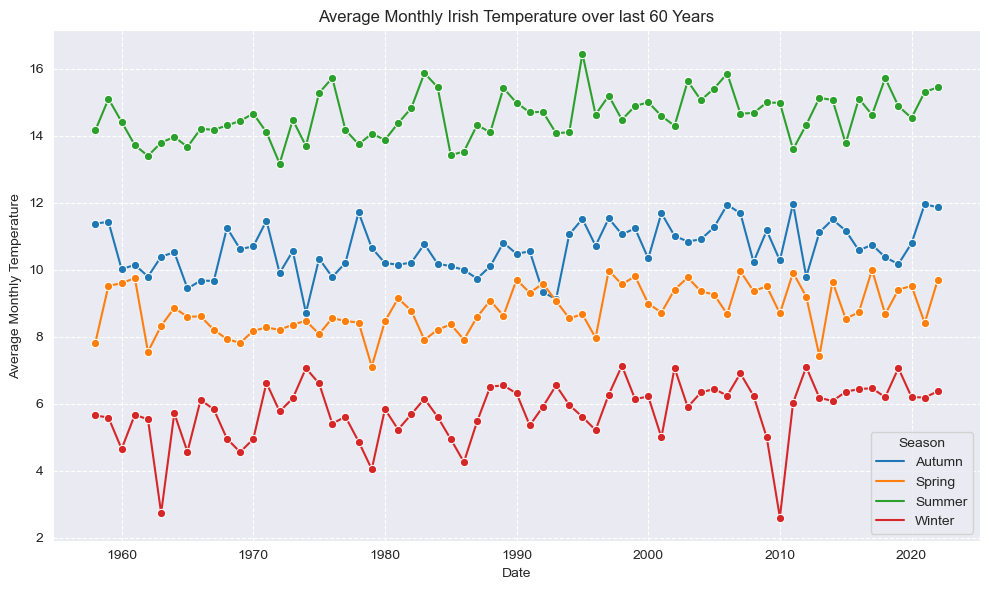

In [52]:
ire_temp = ire_temp.groupby(['Year', 'Season'])['Mean'].mean().reset_index()
ire_temp

plt.figure(figsize=(10, 6))

sns.lineplot(data=ire_temp, x='Year', y='Mean', hue = 'Season', marker='o')

plt.xlabel('Date')
plt.ylabel('Average Monthly Temperature')
plt.title('Average Monthly Irish Temperature over last 60 Years')

plt.tight_layout()
plt.show()

From reviewing the above graph there are a few immediate points of interest.  It shows the winters of 1962/1963 [[ref]](http://www.irishidentity.com/extras/weather/stories/196263.htm#:~:text=The%20winter%20of%201962%2F1963,and%20barely%20relented%20until%20March.) and 2010/2011 [[ref]](https://www.met.ie/cms/assets/uploads/2017/08/ColdSpell10.pdf) were particularly cold, which is backed up in new articles from the time. It also highlights a heatwave that hit in Summer of 1995 [[ref]](https://en.wikipedia.org/wiki/1995_British_Isles_heatwave).

By finding an average value for the full year we can plot the average annual temperature in Ireland over this time period. 

In [53]:
ire_temp = ire_temp.groupby('Year')['Mean'].mean().reset_index()
ire_temp.rename(columns = {'Year': 'Year', 'Mean': 'Annual Average Temperature'}, inplace=True)
ire_temp.head()

,Year,Annual Average Temperature
0,1958,9.753472
1,1959,10.413194
2,1960,9.670833
3,1961,9.825000
4,1962,9.071795


Text(0.5, 1.0, 'Mean Annual Temperature of Ireland Since 1958')

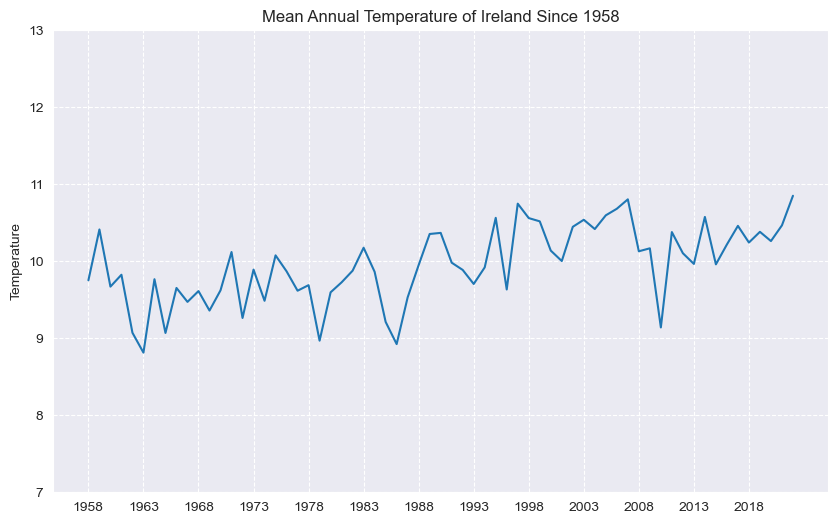

In [54]:
#Plot of Irish temperatures since 1958

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(ire_temp['Year'], ire_temp['Annual Average Temperature'])
ax1.set_xticks(ire_temp['Year'][::5])
ax1.set_ylabel("Temperature")
ax1.set_ylim(7, 13)
plt.title("Mean Annual Temperature of Ireland Since 1958")

In [55]:
# Joining the 1830-1860s dataset to the met.ie present day dataset.
# There is an overlap of years (1958-1968). The met.ie datapoints seem more consistent and reliable so I will cut off the 1830-1860s dataset at 1957.
all_ireland_until_1950s = all_ireland_until_1950s.head(123) # complete until 1957

complete_ire_temp = pd.concat([all_ireland_until_1950s, ire_temp], ignore_index = True)

complete_ire_temp.head()

,Year,Annual Average Temperature
0,1831,10.771441
1,1832,10.437295
2,1833,10.730021
3,1836,10.193009
4,1837,10.075601


Text(0.5, 1.0, 'Mean Annual Temperature of Ireland')

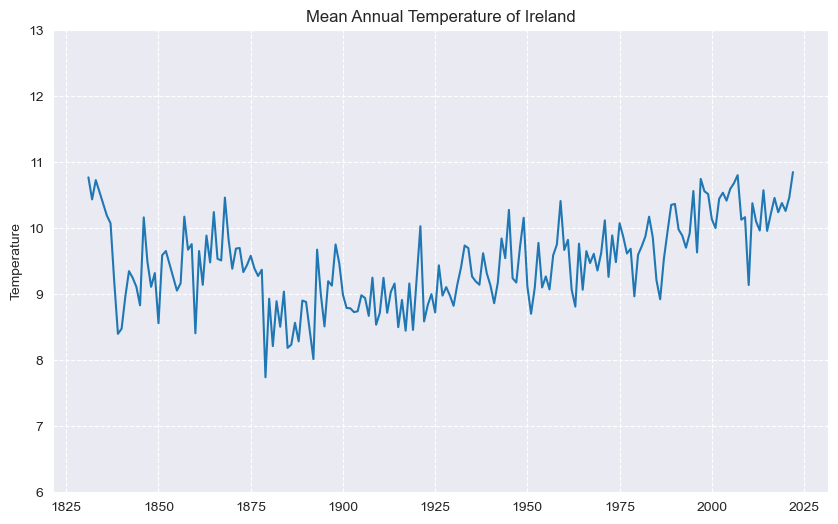

In [56]:
#Plot of Mean Annual Temperature in Ireland since 1831

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(complete_ire_temp['Year'], complete_ire_temp['Annual Average Temperature'])
ax1.set_ylabel("Temperature")
ax1.set_ylim(6, 13)
plt.title("Mean Annual Temperature of Ireland")

In [57]:
#Irish Anomaly using 100 years

ire_baseline_start =1831
ire_baseline_end = 1931

ire_bs = complete_ire_temp[(complete_ire_temp['Year'] >= ire_baseline_start) & (complete_ire_temp['Year'] <= ire_baseline_end)] 
ire_bs   # a new dataframe with all years between 1831 and 1931

,Year,Annual Average Temperature
0,1831,10.771441
1,1832,10.437295
2,1833,10.730021
3,1836,10.193009
4,1837,10.075601
...,...,...
92,1927,8.980044
93,1928,9.108216
94,1929,8.981030
95,1930,8.825171


In [58]:
ire_baseline= ire_bs['Annual Average Temperature'].mean()

complete_ire_temp['Anomaly'] = complete_ire_temp['Annual Average Temperature'] - ire_baseline
complete_ire_temp.head()

,Year,Annual Average Temperature,Anomaly
0,1831,10.771441,1.614604
1,1832,10.437295,1.280458
2,1833,10.730021,1.573184
3,1836,10.193009,1.036172
4,1837,10.075601,0.918764


Text(0.5, 1.0, 'Annual Temperature Anomaly of Ireland')

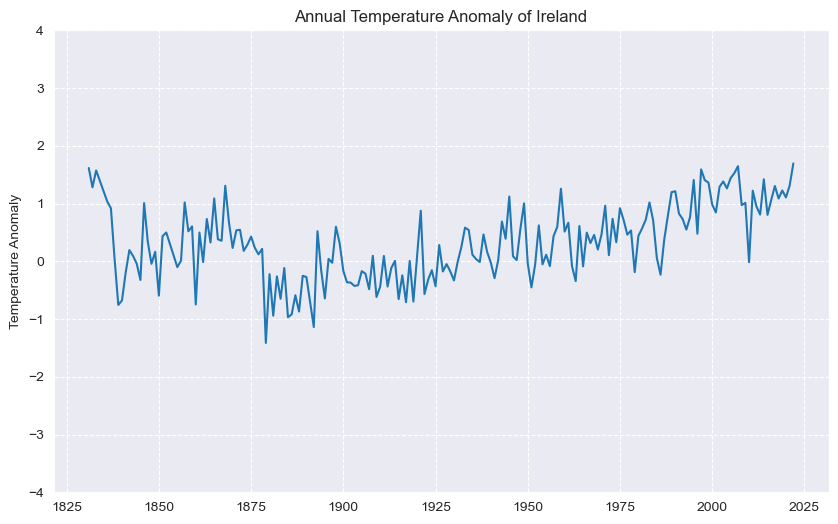

In [59]:
#Plot of Mean Annual Anomaly in Ireland since 1831

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(complete_ire_temp['Year'], complete_ire_temp['Anomaly'])
ax1.set_ylabel("Temperature Anomaly")
ax1.set_ylim(-4, 4)
plt.title("Annual Temperature Anomaly of Ireland")

Looking at the above graph we can see the temperature has been gradually increasing in Ireland since the 1880s. Before this it appears there were higher temperatures and a period of cooling. However this may just highlight the issue of only using 3 weather stations to form a national average.  They do not all have complete records for every year. For example the Markree data had a number of years where there were only 2/3 months were measurements were taken. These happen to have been done in the winter which makes the annual average temperature seem very low. However it is because the other 3 seasons are missing. I have tried to correct for this and remove any years where this is obvious, but it is not a guarantee. 

The reverse may have happened for the years in the 1830s that look particularly high. They may just be missing the data from the colder months. 

In [63]:
#Global anomaly since 1830s
global_anomaly_150 = aicc.head(22)
global_anomaly_150

,Corrected Years,D,temp,acc-EDC3beta,Anomaly
0,2005.000000,NaN,-54.85,3.105321,1.05
1,2000.513333,NaN,-54.85,3.104805,1.05
2,1996.026667,NaN,-54.85,3.104404,1.05
3,1991.540000,NaN,-54.85,3.104025,1.05
4,1984.516667,NaN,-54.85,3.103453,1.05
5,1977.493333,NaN,-54.85,3.102677,1.05
6,1970.470000,NaN,-54.85,3.101557,1.05
7,1962.213333,NaN,-54.85,3.099708,1.05
8,1953.956667,NaN,-54.85,3.096691,1.05
9,1945.700000,NaN,-54.85,3.092812,1.05


Text(0.5, 1.0, 'CO2 Values over Time')

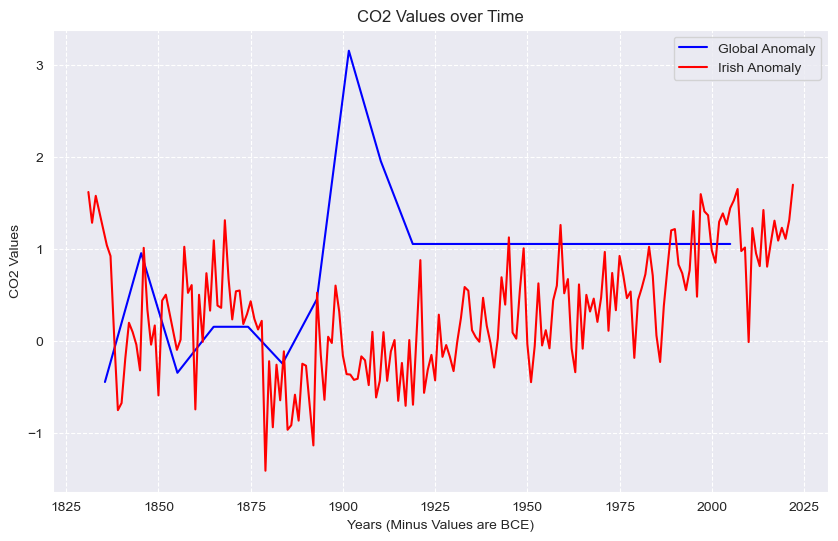

In [61]:

# Plot Global Temparture Anomaly and Irish Temperature Anomaly on same graph

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting using Seaborn lineplot
sns.lineplot(data=global_anomaly_150, x = "Corrected Years", y = "Anomaly", color='blue', label='Global Anomaly')
sns.lineplot(data=complete_ire_temp, x = "Year", y = "Anomaly",  color='red', label='Irish Anomaly')

#final_x_value = ipcc['Corrected Years'].iloc[-1]

# Set labels and title
plt.xlabel('Years (Minus Values are BCE)')
plt.ylabel('CO2 Values')
plt.title('CO2 Values over Time')

# Show legend
#plt.legend()

In previous warm periods, it was not a CO₂ spike that kickstarted the warming, but small and predictable wobbles in Earth’s rotation and orbit around the Sun. CO₂ played a big role as a natural amplifier of the small climate shifts initiated by these wobbles. As the planet began to cool, more CO₂ dissolved into the oceans, reducing the greenhouse effect and causing more cooling. Similarly, CO₂ was released from the oceans to the atmosphere when the planet warmed, driving further warming.

https://theconversation.com/the-three-minute-story-of-800-000-years-of-climate-change-with-a-sting-in-the-tail-73368



In [62]:
https://www.statology.org/matplotlib-average-line/
https://theconversation.com/the-three-minute-story-of-800-000-years-of-climate-change-with-a-sting-in-the-tail-73368
https://www.scientificamerican.com/article/how-are-past-temperatures/
https://www.nature.com/articles/srep21691
https://www.ncei.noaa.gov/access/monitoring/dyk/anomalies-vs-temperature
https://saturncloud.io/blog/how-to-fix-the-pandas-unicodedecodeerror-utf8-codec-cant-decode-bytes-in-position-01-invalid-continuation-byte-error/

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (8838210.py, line 6)